# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
city = "margaret river"


# Construct the URL
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}"

# Make the request and parse the JSON response
response = requests.get(url).json()

# Use pprint to format the JSON output
pprint(response)

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -33.95, 'lon': 115.0667},
 'dt': 1736461761,
 'id': 2066981,
 'main': {'feels_like': 15.48,
          'grnd_level': 1007,
          'humidity': 81,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 15.74,
          'temp_max': 15.74,
          'temp_min': 15.74},
 'name': 'Margaret River',
 'sys': {'country': 'AU', 'sunrise': 1736457563, 'sunset': 1736508870},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 162, 'gust': 5.99, 'speed': 3.48}}


In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | padangsidempuan
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | tsengel
Processing Record 10 of Set 1 | nueva gerona
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | mazamari
Processing Record 16 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 17 of Set 1 | san fernando
Processing Record 18 of Set 1 | ocozocoautla de espinosa
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | waitangi
Processing Record 21

In [44]:
pprint(city_data)

[{'City': 'ribeira grande',
  'Cloudiness': 75,
  'Country': 'PT',
  'Date': 1736461761,
  'Humidity': 94,
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 19.32,
  'Wind Speed': 10.28},
 {'City': 'puerto natales',
  'Cloudiness': 20,
  'Country': 'CL',
  'Date': 1736461762,
  'Humidity': 39,
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 16.25,
  'Wind Speed': 8.23},
 {'City': 'padangsidempuan',
  'Cloudiness': 100,
  'Country': 'ID',
  'Date': 1736461763,
  'Humidity': 98,
  'Lat': 1.3667,
  'Lng': 99.2667,
  'Max Temp': 21.38,
  'Wind Speed': 1.37},
 {'City': 'west island',
  'Cloudiness': 75,
  'Country': 'CC',
  'Date': 1736461764,
  'Humidity': 94,
  'Lat': -12.1568,
  'Lng': 96.8225,
  'Max Temp': 25.99,
  'Wind Speed': 3.09},
 {'City': 'edinburgh of the seven seas',
  'Cloudiness': 100,
  'Country': 'SH',
  'Date': 1736461765,
  'Humidity': 91,
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 17.89,
  'Wind Speed': 5.93},
 {'City': 'albany',
  'Cloudiness': 57,
  'Countr

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,19.32,94,75,10.28,PT,1736461761
1,puerto natales,-51.7236,-72.4875,16.25,39,20,8.23,CL,1736461762
2,padangsidempuan,1.3667,99.2667,21.38,98,100,1.37,ID,1736461763
3,west island,-12.1568,96.8225,25.99,94,75,3.09,CC,1736461764
4,edinburgh of the seven seas,-37.0676,-12.3116,17.89,91,100,5.93,SH,1736461765


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.32,94,75,10.28,PT,1736461761
1,puerto natales,-51.7236,-72.4875,16.25,39,20,8.23,CL,1736461762
2,padangsidempuan,1.3667,99.2667,21.38,98,100,1.37,ID,1736461763
3,west island,-12.1568,96.8225,25.99,94,75,3.09,CC,1736461764
4,edinburgh of the seven seas,-37.0676,-12.3116,17.89,91,100,5.93,SH,1736461765


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

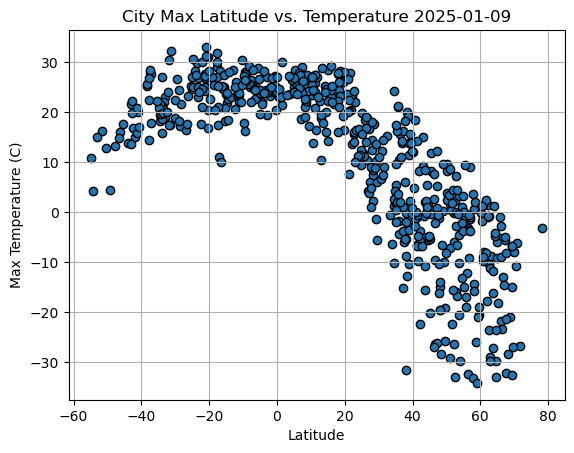

In [51]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

current_date = time.strftime('%Y-%m-%d')
plt.title(f'City Max Latitude vs. Temperature {current_date}')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

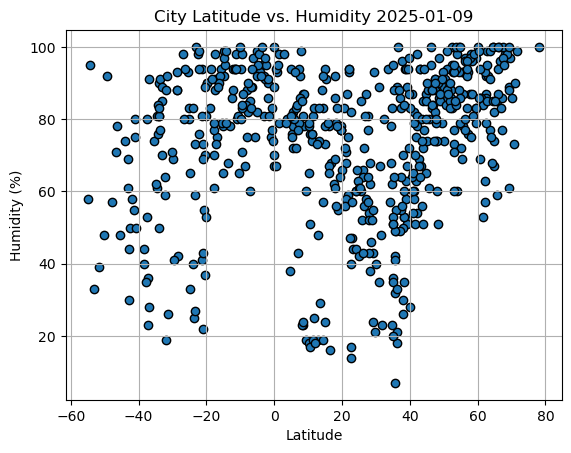

In [53]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

current_date = time.strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Humidity {current_date}')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

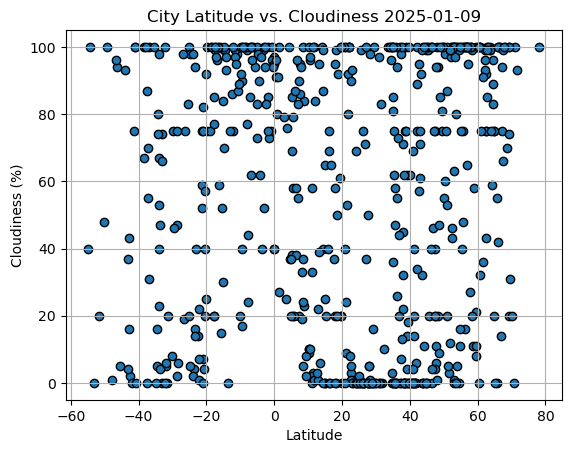

In [55]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

current_date = time.strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Cloudiness {current_date}')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [56]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.32,94,75,10.28,PT,1736461761
1,puerto natales,-51.7236,-72.4875,16.25,39,20,8.23,CL,1736461762
2,padangsidempuan,1.3667,99.2667,21.38,98,100,1.37,ID,1736461763
3,west island,-12.1568,96.8225,25.99,94,75,3.09,CC,1736461764
4,edinburgh of the seven seas,-37.0676,-12.3116,17.89,91,100,5.93,SH,1736461765


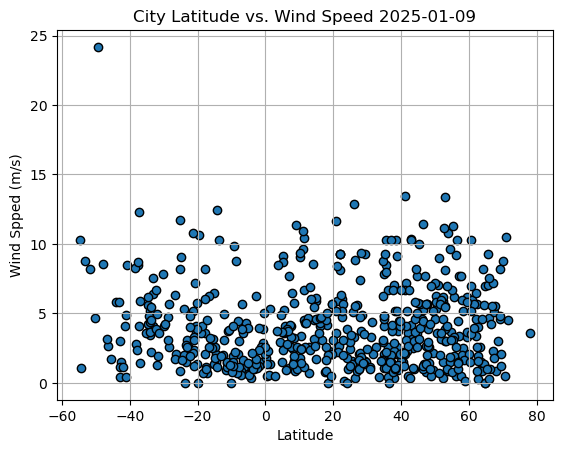

In [57]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Spped (m/s)')

current_date = time.strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Wind Speed {current_date}')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.32,94,75,10.28,PT,1736461761
2,padangsidempuan,1.3667,99.2667,21.38,98,100,1.37,ID,1736461763
5,albany,42.6001,-73.9662,-6.35,69,57,4.02,US,1736461766
8,tsengel,49.4783,100.8894,-19.06,90,100,2.12,MN,1736461769
9,nueva gerona,21.8833,-82.8000,20.46,59,92,8.14,CU,1736461770


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,16.25,39,20,8.23,CL,1736461762
3,west island,-12.1568,96.8225,25.99,94,75,3.09,CC,1736461764
4,edinburgh of the seven seas,-37.0676,-12.3116,17.89,91,100,5.93,SH,1736461765
6,east london,-33.0153,27.9116,23.01,85,0,6.39,ZA,1736461767
7,punta arenas,-53.1500,-70.9167,15.06,33,0,8.75,CL,1736461768


###  Temperature vs. Latitude Linear Regression Plot

Text(1, -25, 'y = -0.69x + 30.50')

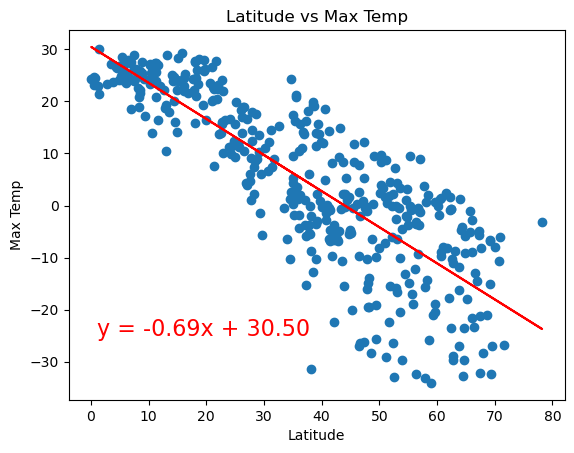

In [93]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(1, -25, regression_equation, fontsize=16, color="red")
plt.show()

Text(-30, 5, 'y = 0.18x + 26.81')

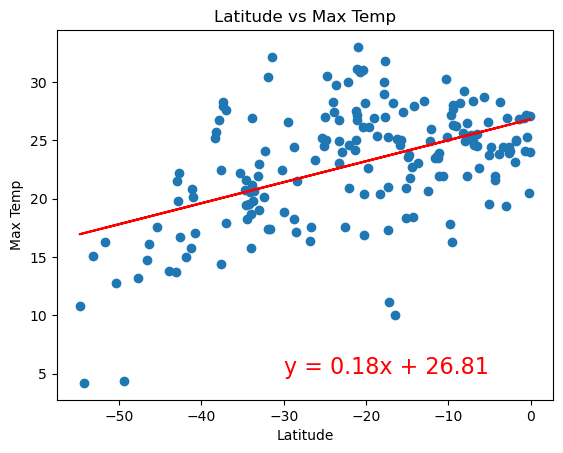

In [86]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(-30, 5, regression_equation, fontsize=16, color="red")
plt.show()

**Discussion about the linear relationship:** Max tempertures in the Southern Hemisphere are more closely aligned and you see in the slope being very gradual compared to the Northern Hemisphere date. In the Northern Hemisphere, you see a larger range of tempertures, specifically it being colder. The larger range contributes to a more drastic slope. 

### Humidity vs. Latitude Linear Regression Plot

Text(45, 25, 'y = 0.41x + 57.89')

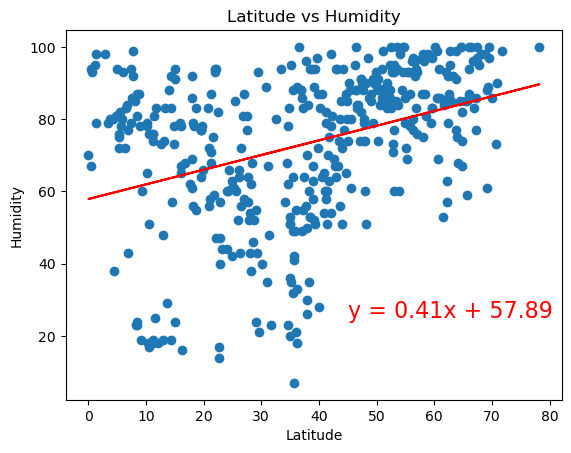

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(45, 25, regression_equation, fontsize=16, color="red")
plt.show()

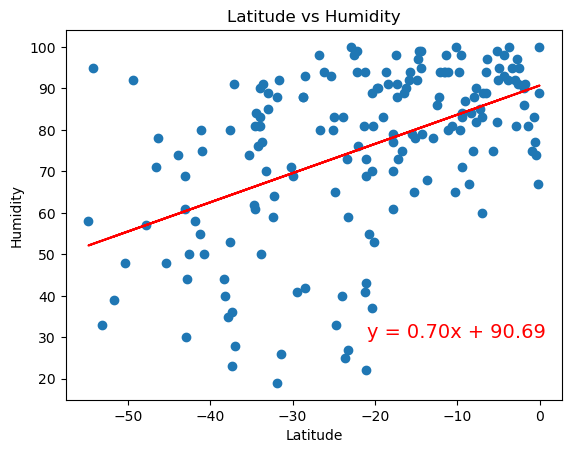

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(-21, 30, regression_equation, fontsize=14, color="red")
plt.show()

**Discussion about the linear relationship:** For both hemispheres, the linear relationship is fairly similar, in the Northern Hemisphere, the further north the latitude got, the more concentrated above 60% humidity became. In the southern hemisphere, we see humidity spread apart the futher we go from the equator, and more sporatic in terms of data. 

### Cloudiness vs. Latitude Linear Regression Plot

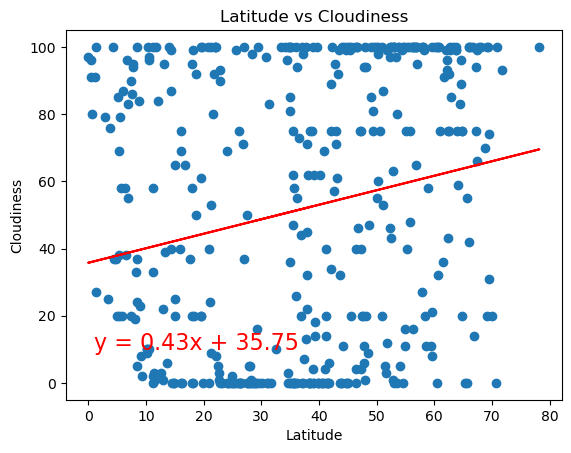

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(1, 10, regression_equation, fontsize=16, color="red")
plt.show()

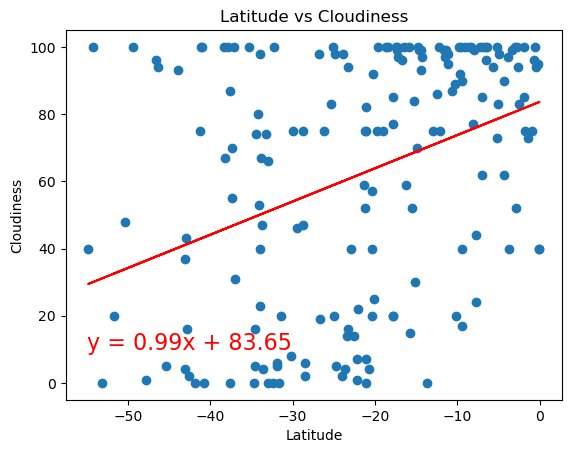

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(-55, 10, regression_equation, fontsize=16, color="red")
plt.show()

**Discussion about the linear relationship:** There doesn't seem to be a strong relationship between Latitude and Cloudiness as they are logging on exterme ends of the cloudiness metric. We also don't know if this varies by season or by day. In the the Southern Hemisphere, there is a small trend where closer to the equator, there is more cloudiness, and the futher away you go, there is less. 

### Wind Speed vs. Latitude Linear Regression Plot

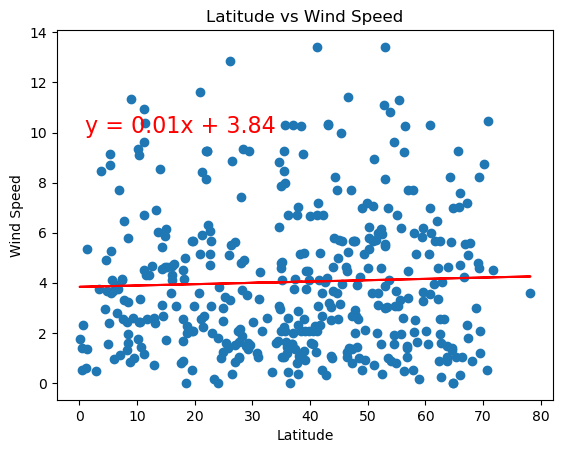

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(1, 10, regression_equation, fontsize=16, color="red")
plt.show()

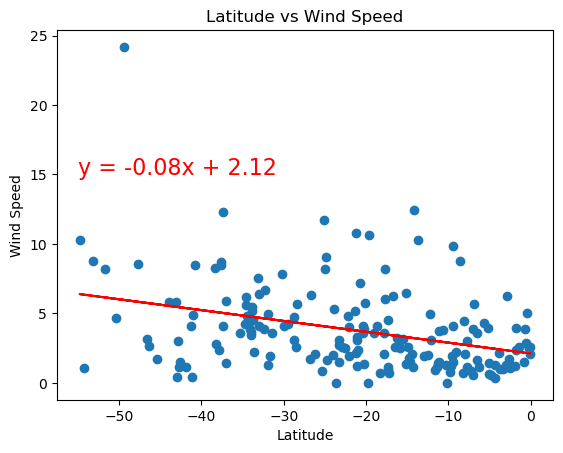

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

regression_line = slope * x_values + intercept
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x_values, regression_line, color='red')
plt.text(-55, 15, regression_equation, fontsize=16, color="red")
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere does not seem to show a trend, as indicated with the slope. The Southern Hemisphere show the majority of the data points being below 5, and more consistant data towards the equator. 